# First Draft Codes for Machine Learning Project

## Import Libraries

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
%matplotlib inline 
#import visuals as vs

## Read csv Data Files

In [5]:
def readCSV():
    raw_data = pd.read_csv('keystats_with_lable.csv')
    return raw_data
raw_data = readCSV()
raw_data.head()

,Date,Unix,Ticker,Price,stock_p_change,SP500,SP500_p_change,Market Cap,Enterprise Value,Trailing P/E,...,Shares Outstanding,Float,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior month,Unnamed: 48,Label
0,1/30/04 19:01,1075460462,a,22.984629,-41.37,84.478371,5.46,1.745000e+10,1.652000e+10,NaN,...,476150000.0,428500000.0,10.01,63.03,9300000.0,3.923,2.17,6930000.0,NaN,Yes
1,4/13/04 4:07,1081800431,a,19.336773,-32.89,84.572807,5.64,1.532000e+10,1.477000e+10,NaN,...,480750000.0,432700000.0,10.00,66.79,7520000.0,2.328,1.74,9170000.0,NaN,Yes
2,12/13/04 21:37,1102945054,a,14.865800,50.92,90.894150,7.57,1.161000e+10,1.037000e+10,33.58,...,487000000.0,389600000.0,20.00,66.68,6930000.0,2.638,1.78,6540000.0,NaN,Yes
3,1/22/05 5:17,1106342239,a,13.593730,57.11,88.599785,9.77,1.071000e+10,9.760000e+09,30.70,...,491070000.0,441400000.0,10.12,67.08,7040000.0,2.385,1.60,6930000.0,NaN,Yes
4,1/9/06 2:35,1136745316,a,21.544186,4.47,99.419518,11.58,1.712000e+10,1.487000e+10,52.82,...,494180000.0,NaN,0.57,70.40,10980000.0,2.300,2.20,5840000.0,NaN,Yes


## Chose features in the data

In [6]:
columns_names = list(raw_data)
columns_names

['Date',
 'Unix',
 'Ticker',
 'Price',
 'stock_p_change',
 'SP500',
 'SP500_p_change',
 'Market Cap',
 'Enterprise Value',
 'Trailing P/E',
 'Forward P/E',
 'PEG Ratio',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue',
 'Revenue Per Share',
 'Qtrly Revenue Growth',
 'Gross Profit',
 'EBITDA',
 'Net Income Avl to Common',
 'Diluted EPS',
 'Qtrly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow',
 'Beta',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 'Float',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float',
 'Shares Short (prior month',
 'Unnamed: 48',
 'Label']

In [18]:
def chose_features():
    features = [
 'Trailing P/E',
 'Forward P/E',
 'PEG Ratio',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue Per Share',
 'Qtrly Revenue Growth', 'EBITDA',
 'Net Income Avl to Common',
 'Diluted EPS',
 'Qtrly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow',
 'Beta',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float','Label']
    selected_columns_data = raw_data[features]
    return features,selected_columns_data
features,selected_columns_data = chose_features()
selected_columns_data.head()
selected_columns_data.shape

(4561, 36)

# Preprocessing

## Handle *Missing Data*

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


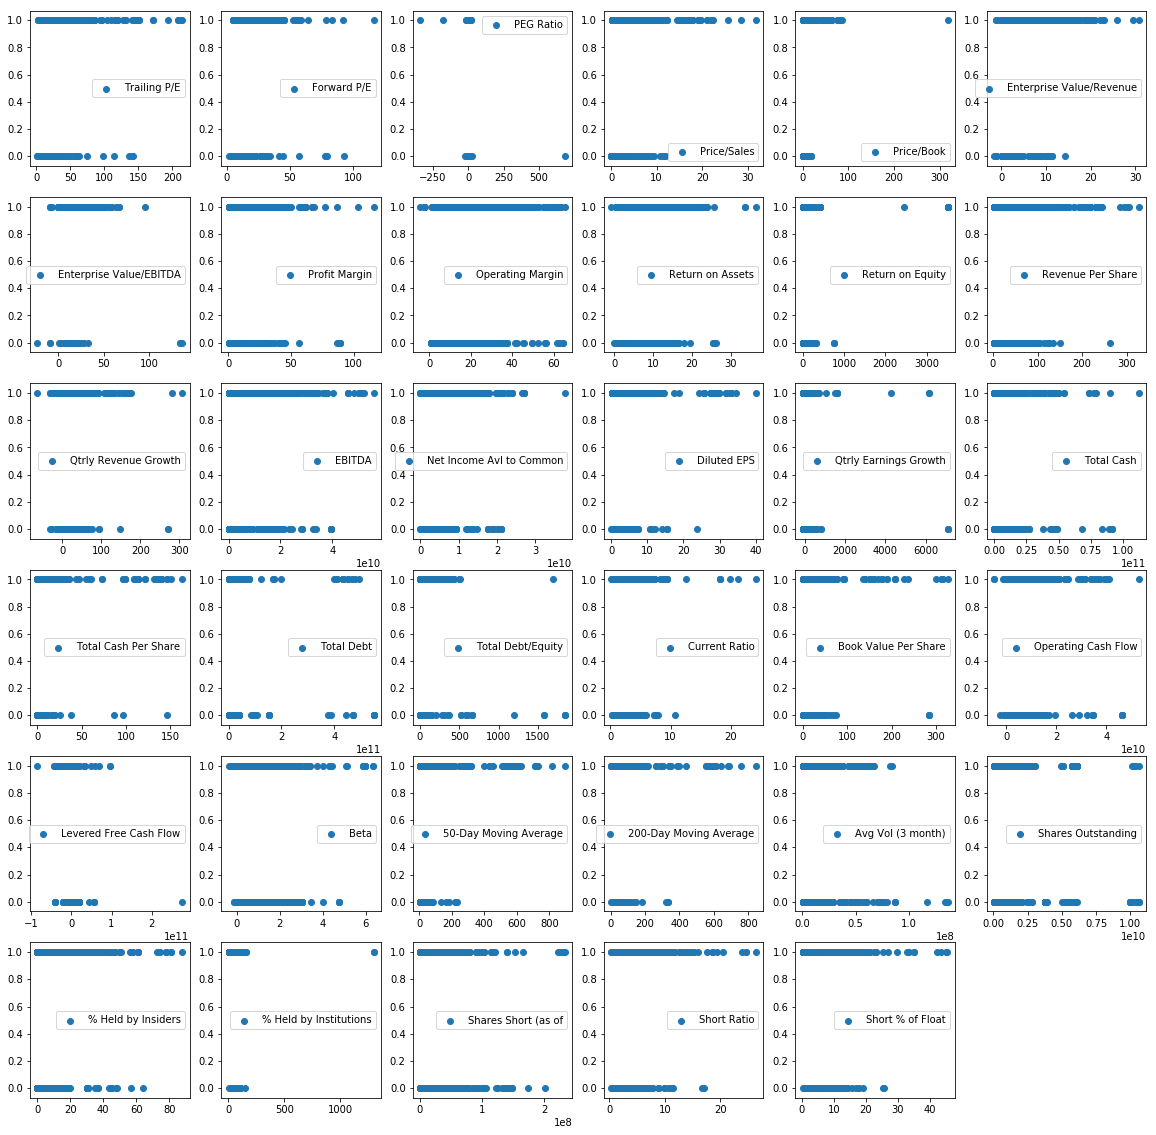

In [45]:
# selected_columns_data.isna()
#selected_columns_data = selected_columns_data.dropna()
df = selected_columns_data.dropna()
#sampleDF['housing'] = sampleDF['housing'].map({'yes': 1, 'no': 0})
df['Label'] = df['Label'].map({'Yes': 1, 'No': 0})
#outlier_idx = np.where(df['PM_Jingan'].values > 300)[0]
#df.drop(df.index[outlier_idx],inplace=True)
outlier_idx = np.where(df['Trailing P/E'].values > 300)[0]
df.drop(df.index[outlier_idx],inplace=True)
#print(df['Label'])
features = [
 'Trailing P/E',
 'Forward P/E',
 'PEG Ratio',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue Per Share',
 'Qtrly Revenue Growth', 'EBITDA',
 'Net Income Avl to Common',
 'Diluted EPS',
 'Qtrly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow',
 'Beta',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float',]

def plot(df):
    plt.figure(figsize=(20,20))
    for i in range(len(features)):
        plt.subplot(6,6,i+1)
        plt.scatter(df[features[i]],df['Label'],label = features[i])
        plt.legend()

plot(df)

### Define Y matrix as the outperformers

In [46]:
'''
Y = selected_columns_data[features[-1]].values
# Encode the label for score calculating later
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y = np.array([number[0] for number in lb.fit_transform(Y)])
'''
Y = np.array(df['Label'])
Y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### Define X matrixes

In [60]:
#X = np.matrix(selected_columns_data[features[0:-1]].values)
#df.drop(['Label'],axis=1,inplace=True)
X = np.matrix(df[features[0:-1]].values)
X
#df.head()

,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA,Profit Margin,Operating Margin,Return on Assets,...,50-Day Moving Average,200-Day Moving Average,Avg Vol (3 month),Shares Outstanding,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Label
5,5.08,17.30,1.26,2.53,3.37,2.33,7.549,56.50,9.38,12.15,...,35.3500,35.7200,2766800.0,425820000.0,5.99,74.8,6920000.0,3.4,1.6,0
6,4.63,17.01,1.21,2.54,3.38,2.18,17.215,56.57,8.99,4.54,...,29.2700,34.2000,3040930.0,425820000.0,6.24,72.7,7350000.0,2.5,1.8,1
7,4.33,15.11,1.13,2.68,3.67,2.53,7.322,66.50,11.12,13.70,...,33.0118,32.5942,2657080.0,407110000.0,8.76,67.6,5910000.0,2.8,1.5,1
8,4.62,16.10,1.13,2.77,3.87,2.51,7.275,66.50,11.12,13.70,...,32.7300,33.2600,2840540.0,403650000.0,6.26,72.0,5910000.0,2.8,1.5,1
9,20.47,13.07,1.04,2.25,3.76,2.30,15.421,11.77,11.38,5.17,...,36.3300,36.7500,2459290.0,371470000.0,1.49,73.8,3640000.0,1.9,1.0,1


## Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

## Data Report

In [67]:
def data_report(df):
    no_good_df = df.loc[df['Label'] == 0]
    good_df = df.loc[df['Label'] == 1]
    print("Number of outperformered stocks: {}".format(len(good_df)))
    print("Number of underperformered stocks: {}".format(len(no_good_df)))
    print("Total number of data points: {}".format(len(df)))
    print("Percentage of outperformer stocks: {}".format(len(good_df)/len(df)))
    print('----------------------------------------------------------------------------')
    print("Train Sample Size: {}".format(len(X_train)))
    print("Test Sample Size: {}".format(len(X_test)))
#data_report(df)
# data_report(raw_data)

def naive_baseline(df):
    print('We assume all the stock can beat the market. We will get an accuracy and precision score. Set that as our baseline.')
    TP = np.sum(Y)
    FP = len(Y) - TP
    TN = 0
    FN = 0
    accuracy = TP/(TP+FP)
    precision = (TP+TN)/(TP+FP+TN+FN)
    print("Naive Predictor: [Accuracy score: {:.4f}, Precision: {:.4f}]".format(accuracy, precision))
naive_baseline(df)

Number of outperformered stocks: 1502
Number of underperformered stocks: 300
Total number of data points: 1802
Percentage of outperformer stocks: 0.8335183129855716
----------------------------------------------------------------------------
Train Sample Size: 1441
Test Sample Size: 361
We assume all the stock can beat the market. We will get an accuracy and precision score. Set that as our baseline.
Naive Predictor: [Accuracy score: 0.8335, Precision: 0.8335]


## Data Normalization

### *MinMax Scaler*

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
def minmax_scale(X):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X
#X_train,X_test = minmax_scale(X_train),minmax_scale(X_test)
#X_train

### *Robust scaler*

In [70]:
def robust_normalize(X):
    from sklearn.preprocessing import robust_scale
    X = robust_scale(X)
    return X
#X_train,X_test = robust_normalize(X_train),minmax_scale(X_test)
#X_train

### *Std-mean Scaler*

In [71]:
def st_scaler_sk(X):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit(X).transform(X)
    # y_mean = scaler.fit(y_train).mean_
    # y_std = np.sqrt(scaler.var_)
    return X

#X_train,X_test = st_scaler_sk(X_train),minmax_scale(X_test)
#X_train

Implementation - Creating a Training and Predicting Pipeline Based on Cross-Validation

To properly evaluate the performance of each model we've chosen, it's important that we create a training and predicting pipeline based on cross validation that allows us to quickly and effectively train models using various training data sets and perform predictions on the validation data sets. 

Split the training data into 5-fold cross-validation set.
Fit the learner to the sampled training data.
Perform predictions on the validation data X_test.
Record the total training and prediction time.
Calculate the precision score and take the average.

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import random
random.seed(18)
def train_predict(learner, X_train, y_train):
    results = {}
    start = time()
    scores = cross_val_score(learner, X_train, y_train, cv=5, scoring='precision')
    end = time()
    results['train_test_time'] = end - start
    results['average_precision'] = scores.mean()
    return results

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
train_predict(clf, X_train, Y_train)

{'average_precision': 0.92197627480590649,
 'train_test_time': 4.444045305252075}

### Implementation: Initial Model Evaluation
In the code cell, we will implement the following:
- Import the three supervised learning models
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model we use

In [100]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Initialize the three models
clf_A = RandomForestClassifier()
clf_B = GaussianNB()
clf_C = SVC()

#print(train_predict(clf_C, X_train, Y_train))

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = (train_predict(clf, X_train, Y_train))
print(results)
'''
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)    
'''
# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)


{'RandomForestClassifier': {'train_test_time': 0.5269255638122559, 'average_precision': 0.92568164916878537}, 'GaussianNB': {'train_test_time': 0.03999638557434082, 'average_precision': 0.87818490643455827}, 'SVC': {'train_test_time': 0.49700355529785156, 'average_precision': 0.83484079428040947}}


'\n    for i, samples in enumerate([samples_1, samples_10, samples_100]):\n        results[clf_name][i] =         train_predict(clf, samples, X_train, y_train, X_test, y_test)    \n'

# Classication
### *(In the examples below, I used the std-mean scaler.)*

### *Random Forest*

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
def rf_clf():
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print("Random Forest Classifier performance\n", "=" * 20)
    print(f"Accuracy score: {clf.score(X_test, Y_test): .2f}")
    print(f"Precision score: {precision_score(Y_test, y_pred): .2f}")
    return y_pred
y_pred = rf_clf()
# y_pred

Random Forest Classifier performance
Accuracy score:  0.90
Precision score:  0.90


### *Guassian Naive Bayesian Classfier*

In [118]:
from sklearn.naive_bayes import GaussianNB
def GNB_clf():
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print("Guassian Naive Bayesian Classfier performance\n", "=" * 20)
    print(f"Accuracy score: {clf.score(X_test, Y_test): .2f}")
    print(f"Precision score: {precision_score(Y_test, y_pred): .2f}")
    return y_pred
y_pred = GNB_clf()

Guassian Naive Bayesian Classfier performance
Accuracy score:  0.78
Precision score:  0.83


### *Support Vector Machine Classifer*

In [119]:
from sklearn.svm import SVC
def SVM_clf():
    clf = SVC()
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print("Support Vector Machine Classifer performance\n", "=" * 20)
    print(f"Accuracy score: {clf.score(X_test, Y_test): .2f}")
    print(f"Precision score: {precision_score(Y_test, y_pred): .2f}")
    return y_pred
y_pred = SVM_clf()

Support Vector Machine Classifer performance
Accuracy score:  0.83
Precision score:  0.83


# Improvement Suggestions For Andy

### *First, I only select some features for the sake of simplicity. You can choose more or less features in the features  in the chose features sector.*
### *Second, I directly normalize the entire dataset, which is not a great idea. The thing is, the visual code from finding_donors, is specifically designed for that dataset, and changing it is beyond my ability. It would be great if you could do some feature engineering work for me (such as log some skewed distributed features, etc).*
### *Third, I only paired one of the three ways of normalization, which is the std-mean scaler ( for no good reasons), with each classifer. You could do some more pairing later.*
### *Fourth, it would be great if you could help with the extraxtion of importance features from these features. I have no idea how to do that because: the importance extraction in finding donors instance can be done easily since they train the dataframe but not the matrix. However, there will be a lot of mishaping bugs or other nonsense bullshit bugs if you train data in the dataframe directly, therefore, in this case, I trained the data in a numpy matrix.*
### *Little more in the future, ploting... this is a hard one, and is quite necessary for presentation. And I am having a little bit of trouble to draw fancy graphs...*